### Instrucciones generales <a class="tocSkip"></a>

1. Forme un grupo de **máximo dos estudiantes**
1. Versione su trabajo usando un **repositorio <font color="red">privado</font> de github**. Agregue a su compañero y a su profesor (usuario github: phuijse) en la pestaña *Settings/Manage access*. No se aceptaran consultas si la tarea no está en github. No se evaluarán tareas que no estén en github.
1. Se evaluará el **resultado, la profundidad de su análisis y la calidad/orden de sus códigos** en base al último commit antes de la fecha y hora de entrega". Se bonificará a quienes muestren un método de trabajo incremental y ordenado según el histórico de *commits*
1. Sean honestos, ríganse por el [código de ética de la ACM](https://www.acm.org/about-acm/code-of-ethics-in-spanish)


## Integrantes: <a class="tocSkip"></a>

**Ignacio Castro**

**Enzo Meneses**

# Tarea 1: Análisis de señales usando la FFT

Para esta tarea considere la señal adjunta guardada en el archivo `elefante_ruidoso.dat`

Esta señal tiene valores complejos y fue muestreada a $100$ [Hz]

In [1]:
import numpy as np
with open('elefante_ruidoso.npy', 'rb') as f:
    x = np.load(f)

## Pregunta 1: Análisis preliminar (20%)

Responda
- ¿Cuántas muestras tiene la señal? ¿Cuál es la duración o largo temporal de la señal? 
- ¿Cuál es la mayor frecuencia que podemos estudiar usando transformada de Fourier en este caso? Fundamente su respuesta

Muestre 

- Una gráfica de linea (`plt.plot`) con las partes real e imaginaria de la señal en función del tiempo
- Una nube de puntos (`plt.scatter`) con la parte imaginaria de la señal en función de la parte real de la misma

Describa y clasifique la señal según los comportamientos que observa

In [2]:
#¿Cuántas muestras tiene la señal? ¿Cuál es la duración o largo temporal de la señal? 
x.shape

(2000,)

La señal tiene 2000 muestras. Si la frecuencia de muestreo es 100Hz entonces la duración de la señal es de 2000/100 = 20 segundos.

**¿Cuál es la mayor frecuencia que podemos estudiar usando transformada de Fourier en este caso? Fundamente su respuesta**

La frecuencia maxima que podremos estudiar será 50 Hz. Esta es conocida como Frecuencia de Nyquist, que corresonde a la mitad de la frecuencia de muestreo y es la maxima frecuencia más alta con que se puede representar una señal muestreada antes que empieze a ocurrir aliasing.

El aliasing ocurre debido a que los puntos obtenidos del muestreo pueden pertenecer a más de una señal, y existen infinitas señales de mayor frecuencia que se pueden ajustar a dichos puntos. Por esto es que se analiza hasta la mitad de la frecuencia de muestreo, de forma que otras frecuencias que se ajusten a los mismos puntos no aparezcan en el análisis. Al hacer esto se asume que la señal que se busca se encuentra en dicho rango de frecuencias.

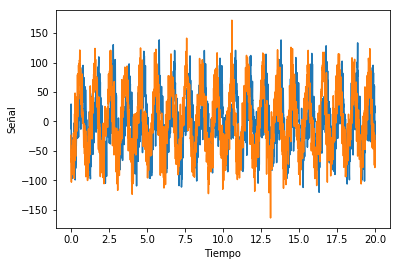

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

#Una gráfica de linea (plt.plot) con las partes real e imaginaria de la señal en función del tiempo

rdata=x.real
idata=x.imag

Fs=100
time=np.arange(0.0,len(x)/Fs,1/Fs)

plt.plot(time, rdata);
plt.plot(time, idata)
plt.xlabel('Tiempo')
plt.ylabel('Señal')
plt.show()

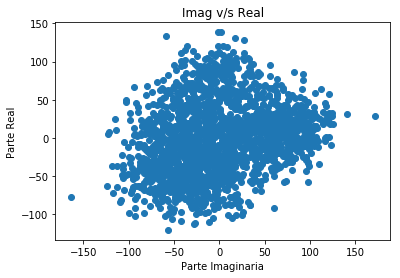

In [4]:
#Una nube de puntos (plt.scatter) con la parte real de la señal en función de la parte imaginaria de la misma.
plt.figure()
plt.scatter(idata,rdata)
plt.ylabel('Parte Real')
plt.xlabel('Parte Imaginaria')
plt.title('Imag v/s Real')
plt.show()

# Describa y clasifique la señal según los comportamientos que observa:

Respecto a la gráfica en linea, aunque el ruido dificulta su clasificación, tiene la apariencia de que podría tanto la parte real como imaginaria podrían ser periodica y deterministica una vez se limpie el ruido y se recupere la señal original.

Respecto a la gráfica de nube, a simple vista no se aprecia ninguna relación entre la parte real y la imaginaria, probablemente debido al ruido. Aunque pareciera ser similar a una distribución gaussiana (algo deforme) debido a que al alejarse del centro la densidad de puntos es menor. 

Al revisar este gráfico después de "ver el elefante" se puede apreciar la silueta del elefante con ruido. Además conociendo la figura se entiende porque en el exterior de la figura hay menos puntos que al interior, ya que los puntos tienen la misma probabilidad de moverse en cualquier dirección con el ruido y el centro es la única zona donde se pueden juntar desde todas las direcciones.


## Pregunta 2: Análisis de Fourier (40%)

- Escriba una función que reciba la señal y retorne el espectro de amplitud, el espectro de fase y las frecuencias asociadas a la señal. 
- Muestre dos gráficos con el espectro de amplitud y espectro de fase en función de la frecuencia, respectivamente. Comente sobre lo que observa
- Escriba una función que reciba un número entero $M$ y que retorne un espectro de magnitud modificado donde los $M$ componentes mayores se mantienen y todos los demás se hacen igual a cero, retorne también el índice de los $M$ componentes mayores
- Muestre graficamente el espectro de magnitud modificado con $M=7$. Imprima los valores de las **frecuencias, amplitudes y fases** de los $M$ componentes ordenados en orden descedente según su amplitud


In [5]:
#Escriba una función que reciba la señal y retorne el espectro de amplitud, el espectro de fase
#y las frecuencias asociadas a la señal. 

from scipy import fftpack

def fourierfun(signal,Fs):
    data = fftpack.fft(signal)
    data_freq = fftpack.fftfreq(n=len(data), d=1/Fs)
    data_amp = np.abs(data)
    data_angle = np.angle(data)
    return data_freq,data_amp,data_angle

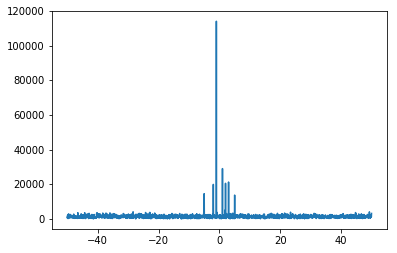

In [6]:
#Muestre dos gráficos con el espectro de amplitud y espectro de fase en función de la
#frecuencia, respectivamente. Comente sobre lo que observa

freqs,SA,SP=fourierfun(x,Fs)

plt.plot(fftpack.fftshift(freqs),fftpack.fftshift(SA))
plt.show()

En el espectro de magnitud se aprecia claramente que la señal original está probablemente compuesta por 7 frecuencias, siendo una de ellas especialmente predominante y que todo el resto son producto de ruido blanco. No es posible determinar si otras frecuencias pertenecen a la señal original y fueron comidas por el ruido. Otro aspecto interesante es que debido a ser una señal compuesta por números complejos no hay una simetría con respecto al eje de ordenadas.

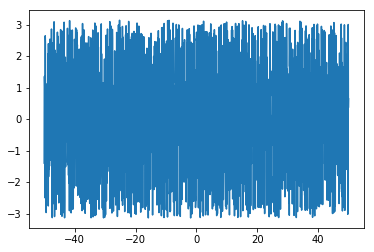

In [7]:
plt.plot(fftpack.fftshift(freqs),fftpack.fftshift(SP))
plt.show()

In [8]:
SP[SA > 10000]

array([-2.82861611,  1.13605401, -3.03996873,  0.0412039 ,  0.10721682,
       -1.99649896, -1.29886946])

Con el espectro de fase, no se puede sacar ninguna conclusión, ya que la mayoría son fases pertenecientes al ruido, que es lo que estamos intentando eliminar. Sin embargo, al considerar solo las fases de las frecuencias que no son ruido, esto resulta muy útil permitiendo reconstruir la señal original.


In [9]:
#Escriba una función que reciba un número entero 𝑀 y que retorne un espectro de magnitud modificado donde 
#los 𝑀 componentes mayores se mantienen y todos los demás se hacen igual a cero, retorne también el índice 
#de los 𝑀 componentes mayores

def mamplitude(SA,M):
    amps=np.copy(SA)
    target=sorted(frozenset(amps), reverse=True)[M-1]
    mask=amps<target
    amps[mask]=0
    index=amps.nonzero()
    return amps,index

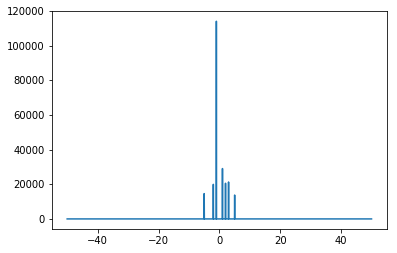

In [10]:
#Muestre graficamente el espectro de magnitud modificado con 𝑀=7.

SAN,index=mamplitude(SA,7)
plt.plot(fftpack.fftshift(freqs),fftpack.fftshift(SAN))
plt.show()

In [11]:
#Imprima los valores de las frecuencias, amplitudes y fases de los 𝑀 componentes ordenados en orden 
#descedente según su amplitud
def sortedM(freqs, SA, SP, M):
    sfreqs = np.array(sorted(freqs, key=(lambda x: SA[int(x/freqs[1])]), reverse=True))
    display(sfreqs[:M])
    display(SA[(sfreqs/freqs[1]).astype(int)][:M])
    display(SP[(sfreqs/freqs[1]).astype(int)][:M])
    
sortedM(freqs, SA, SP, 7)

array([-1.,  1.,  3.,  2., -2., -5.,  5.])

array([114172.07496405,  29095.71108497,  21326.97306033,  20598.95161544,
        19964.34184966,  14630.20281002,  13788.41460493])

array([-1.29886946, -2.82861611, -3.03996873,  1.13605401, -1.99649896,
        0.10721682,  0.0412039 ])

## Pregunta 3: Reconstrucción (40%)

Use la transformada de Fourier inversa para reconstruir la señal en base al espectro de amplitud modificado y el espectro de fase. 

Para $M=[100, 10, 7, 5, 3, 1]$ (puede usar otros valores si lo considera necesario en su análisis) muestre

- Una gráfica de linea (`plt.plot`) con las partes real e imaginaria de la señal reconstruida en función del tiempo
- Una nube de puntos (`plt.scatter`) con la parte imaginaria en función de la parte real de la señal reconstruida

Describa y comente lo que observa, en particular compare cada resultado con el caso `M=len(x)` (caso original) y discuta sobre lo que ocurre para $M>7$, $M=7$ y $M<7$ con respecto al ruido y la información relevante de la señal ¿Pueden ver al elefante en el ruido? 

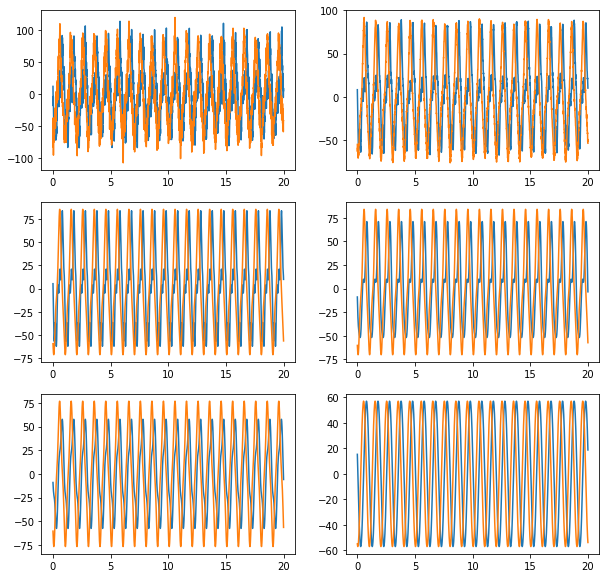

In [12]:
#Una gráfica de linea (plt.plot) con las partes real e imaginaria de la señal reconstruida en 
#función del tiempo
M = [100,10,7,5,3,1]
fig, axs = plt.subplots(3,2, figsize=(10,10))
for m, ax in zip(M, axs.flatten()):
    SAN,index=mamplitude(SA,m)
    expo=SAN*np.exp(1j*SP)
    newdata=fftpack.ifft(expo)
    rdata=newdata.real
    idata=newdata.imag
    ax.plot(time,rdata)
    ax.plot(time,idata)

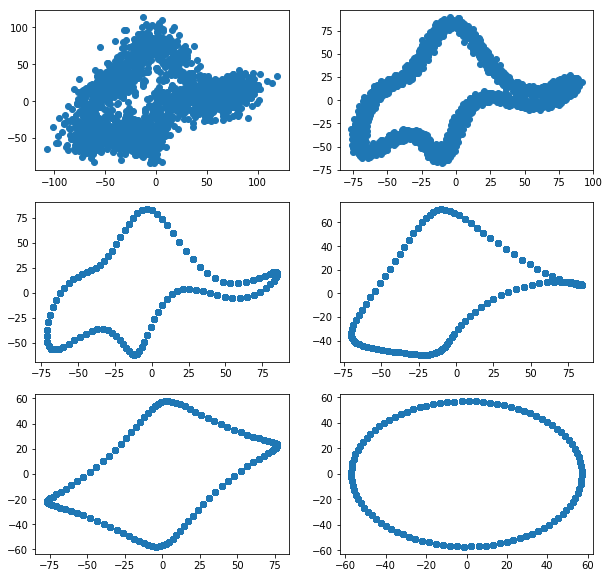

In [13]:
#Una nube de puntos (plt.scatter) con la parte real en función de la parte imaginaria de la señal 
#reconstruida
M = [100,10,7,5,3,1]
fig, axs = plt.subplots(3,2, figsize=(10,10))
for m, ax in zip(M, axs.flatten()):
    SAN,index=mamplitude(SA,m)
    expo=SAN*np.exp(1j*SP)
    newdata=fftpack.ifft(expo)
    rdata=newdata.real
    idata=newdata.imag
    ax.scatter(idata,rdata)

# Describa y comente lo que observa, en particular compare cada resultado con el caso M=len(x) (caso original) y discuta sobre lo que ocurre para 𝑀>7, 𝑀=7 y 𝑀<7 con respecto al ruido y la información relevante de la señal ¿Pueden ver al elefante en el ruido?

En el caso de la gráfica de linea, comparado con el caso original (M=2000),  podemos ver como para M mayores a 7, las lineas parecieran verse más gruesas y erraticas, con formas irregulares. Por el contrario, a valores de M más bajo se comienza a perder detalle y se ven patrones más uniformes, con una perdida de la forma general que tenia la señal inicialmente. M=7 parece ser el punto de equilibrio en que se tienen suficientes componentes para que se pueda ver bien definida la señal al mismo tiempo que mantiene suficiente detalle para mantener sus caracteristicas más importantes.

Respecto a la gráfica de nube de puntos, en el caso original (M=2000) claramente no es posible ver al elefante, aunque si es posible notar su silueta una vez vista la señal original.
M = 7 es la señal original, se aprecia claramente el elefante y como una sola línea que de no ser por la frecuencia de muestreo probablemente sería continua y no se aprecia ruido.
Con M > 7 sigue siendo posible ver el elefante, e incluso con valores como 8 o 9 se podría debatir que se aprecia mejor como una línea y no varios puntos, pero esto varía dependiendo de cómo se grafique y claramente hay ruido. Mientras más aumenta M más ruido hay y el elefante empieza a perder su forma hasta que eventualmente es posible de ver.
Para M < 7 el elefante pierde su forma debido a que no hay suficiente detalle y mientras más disminuye M más simple se vuelve la figura graficada y con M = 1 se trata simplemente de una elipse.

En general se pudo ver bien el elefante para M=7 (y en menor grado para M=10), por lo que es probable que la señal original sin ruido se compusiera de 7 frecuencias. Otra observación para ambos tipos de graficos es que el cambio observado comienza a ser mayor a medida que se van acercando a 0 (por ejemplo, el gráfico de nube para M=100 se ve muy similar al de M=2000, pero hay una gran diferencia entre M=7 y M=3). Esto podría deberse que al eliminar componentes inicialmente se esta eliminando ruido, por lo que no altera el contorno general de la figura, pero al excluir una de las ultimas 7 componentes se esta eliminando una de las componentes de la señal original sin ruido, por lo que se comienza a perder el mensaje.


## Indicaciones

- Puede usar las funciones `np.real` e `np.imag` para obtener la parte real e imaginaria de un número complejo, respectivamente
- Si `x` y `y` son la parte real e imaginaria de un número complejo, puedes reconstruir el número complejo con `c = x + 1j*y`
- Si `rho` y `phi` son la amplitud y ángulo de un número complejo, puedes reconstruir el número complejo usando `c = rho*np.exp(1j*phi)`
- Recuerden que un slice de un `ndarray` no es una copia sino una referencia. Para crear copias use el atributo `.copy()`
- Usa `scipy.fft.fft` y `scipy.fft.ifft` para calcular la FFT directa e inversa, respectivamente

## Éxito!

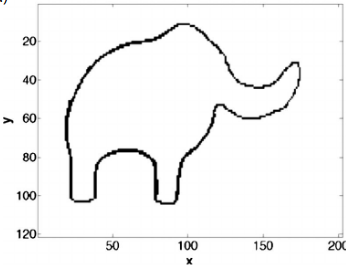